# Fundamentos de risco e retornos

In [26]:
# Bibliiotecas importadas
import numpy as np
import pandas as pd 
import yfinance as yf
%matplotlib inline

## Retorno Simples ($R_{t, t+1}$)

$$R_{t, t+1} = \dfrac{P_{t+1} - P_t}{P_t}$$  

ou alternativamente  

$$R_{t, t+1} = \dfrac{P_{t+1}}{P_t} - 1$$

Exemplo:

In [27]:
empresas = {
    'Banco do Brasil S.A.': 'BBAS3.SA',
    'Banco Bradesco S.A.': 'BBDC3.SA',
    'Itaúsa - Investimentos Itaú SA': 'ITSA4.SA'
}

In [35]:
tickers = list(empresas.values())
prices = yf.download(tickers=tickers, start='2019-12-31', end='2020-12-31', progress=False)['Adj Close']
prices.head()

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01-02,48.002701,27.186686,12.605556
2020-01-03,47.922398,26.762453,12.421083
2020-01-06,47.288910,26.608953,12.394733
2020-01-07,46.932011,26.156132,12.227830
2020-01-08,46.503735,25.757040,12.043359


In [36]:
prices.shape

(248, 3)

Cálculo do Retorno Simples para cada ação.

In [61]:
returns = prices.pct_change()

returns.head()

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01-02,NaN,NaN,NaN
2020-01-03,-0.001673,-0.015604,-0.014634
2020-01-06,-0.013219,-0.005736,-0.002121
2020-01-07,-0.007547,-0.017018,-0.013466
2020-01-08,-0.009125,-0.015258,-0.015086


Visualização Gráfica da série temporal de preços

<AxesSubplot:xlabel='Date'>

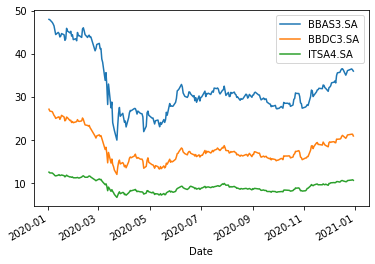

In [62]:
prices.plot()

Visualização gráfica dos retornos mensais

In [40]:
returns_montly = returns.resample('M').mean()

returns_montly

,BBAS3.SA,BBDC3.SA,ITSA4.SA
Date,,,
2020-01-31,-0.004717,-0.005666,-0.005120
2020-02-29,-0.001132,-0.007282,-0.002681
2020-03-31,-0.018780,-0.013786,-0.012421
2020-04-30,0.002588,0.002647,0.001918
2020-05-31,0.004632,0.001372,-0.000284
2020-06-30,0.002427,0.003411,0.004214
2020-07-31,0.002119,0.004240,0.004851
2020-08-31,-0.000538,-0.003868,-0.005518
2020-09-30,-0.004387,-0.002387,-0.003065


<AxesSubplot:xlabel='Date'>

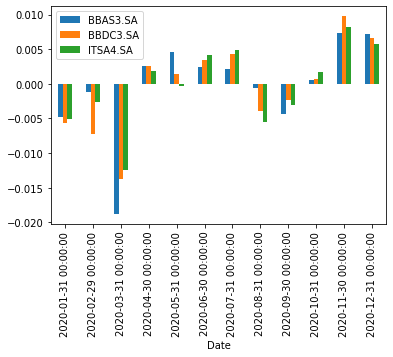

In [43]:
returns_montly.plot.bar()

Volatilidade dos ativos

Corresponde ao Desvio Padrão dos retornos

In [49]:
volatility = returns.std()
volatility

BBAS3.SA    0.039122
BBDC3.SA    0.035640
ITSA4.SA    0.027956
dtype: float64

Retorno médio de cada ação

In [47]:
returns.mean()

BBAS3.SA   -0.000395
BBDC3.SA   -0.000417
ITSA4.SA   -0.000269
dtype: float64

Retorno anual

In [48]:
(returns + 1).prod() - 1

BBAS3.SA   -0.249744
BBDC3.SA   -0.228378
ITSA4.SA   -0.150698
dtype: float64

## Segundo Exemplo

In [63]:
returns = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                        header=0, index_col=0, parse_dates=True, na_values=-99.99
                      )
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [64]:
columns = ['Lo 10', 'Hi 10']

returns = returns[columns]

returns.head()

,Lo 10,Hi 10
192607,-1.45,3.29
192608,5.12,3.70
192609,0.93,0.67
192610,-4.84,-2.43
192611,-0.78,2.70


In [65]:
returns = returns / 100
returns.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [66]:
returns.columns = ['SmallCaps', 'LargeCaps']
returns.head()

,SmallCaps,LargeCaps
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


<AxesSubplot:>

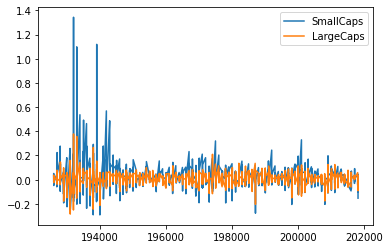

In [67]:
returns.plot.line()

Volatilidade

In [68]:
volatility = returns.std()
volatility

SmallCaps    0.106288
LargeCaps    0.053900
dtype: float64

In [69]:
annualized_vol = volatility * np.sqrt(12)
annualized_vol

SmallCaps    0.368193
LargeCaps    0.186716
dtype: float64

Retorno mensal

In [70]:
n_months = returns.shape[0]

return_per_month = ((1 + returns).prod() ** (1 / n_months)) - 1

return_per_month

SmallCaps    0.012986
LargeCaps    0.007423
dtype: float64

In [72]:
annualized_return = (return_per_month + 1) ** 12 - 1

annualized_return

SmallCaps    0.167463
LargeCaps    0.092810
dtype: float64

In [73]:
annualized_return = ((1 + returns).prod() ** (12 / n_months)) - 1

annualized_return

SmallCaps    0.167463
LargeCaps    0.092810
dtype: float64

In [75]:
risk = annualized_return / annualized_vol

risk

SmallCaps    0.454825
LargeCaps    0.497063
dtype: float64

In [76]:
riskfree_rate = 0.03

excess_return = annualized_return - riskfree_rate

sharpe_ratio = excess_return / annualized_vol

sharpe_ratio

SmallCaps    0.373346
LargeCaps    0.336392
dtype: float64

## Máximo _Drawdown_ (Máximo Rebaixamento)

> É a perda máxima experimentada a partir de um pico anterior para um vale subseguente. 

> O _Dradown_ é uma medida do risco de queda. 

> É a perda teórica que você teria sofrido se tivesse investido no pico e vendido na baixa.



**Etapas para o cálculo do Máximo _Drawdown_:**

1. Converter a série de retornos para o que é chamado de **índice de riqueza**.
2. Calcular os picos a cada ponto de tempo.
3. Plotar os _drawdowns_ ao longo do tempo.